## Observations and Insights 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [97]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [98]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [99]:
df= pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [100]:
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [101]:
#provided by LA
dup_mouse_list = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(dup_mouse_list)#=test

['g989']


In [102]:
dup_mouse=df[df.loc[:,'Mouse ID']=='g989']
dup_mouse['Mouse ID'].count()

13

In [90]:
# # discuss why this did not work with staff
# dup_show_df['dups']=df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)
# dup_show_df.count()#+test
# # dup_shows_df=df[df.loc[:,'dups'] == True]
# # dup_shows_df.count()

In [103]:
# provided by LA
clean_df = df[df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [89]:
#Disscuss with staff why this did not work
# clean_df=df.drop_duplicates(['Mouse ID','Timepoint'],keep=False)
# clean_df.count()


In [2]:
# Checking the number of mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [106]:
clean_df['Tumor Volume (mm3)'].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [142]:
stats_mean=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
stats_median=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
stats_var=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stats_std=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
stats_sem=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
stats_df=pd.DataFrame({
    'Mean':stats_mean,
    'Median':stats_median,
    'Variance':stats_var,
    'Standard Deviation':stats_std,
    'SEM':stats_sem
})
# why wont this work?
# stats_df.columns=pd.MultiIndex.from_product([['Tumor Volume "(mm3)"'],df.columns])
stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [140]:
agg_stats=clean_df[['Drug Regimen','Tumor Volume (mm3)']]
agg_stats.head()#+test
agg_df=agg_stats.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
agg_df
# f.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [154]:
list(clean_df['Drug Regimen'].unique())

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

Text(0.5, 1.0, 'Drug Trial Sample Sizes')

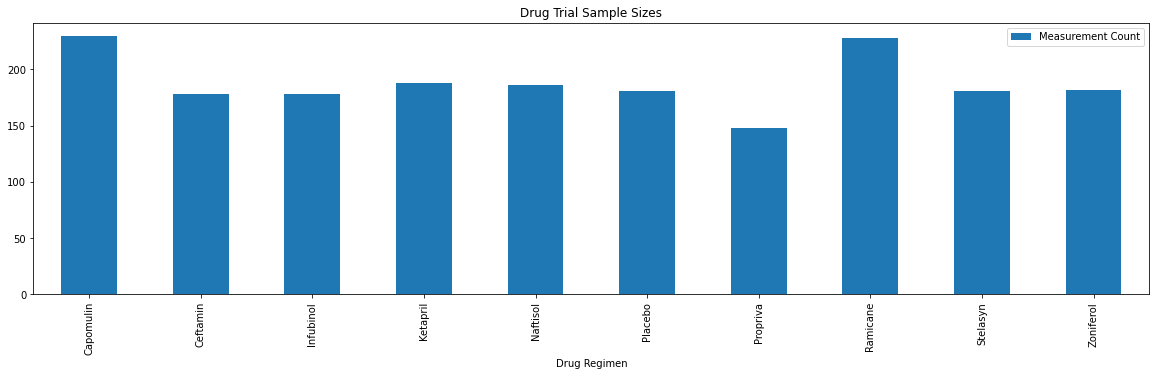

In [174]:
bar_cnt=clean_df.groupby('Drug Regimen').count()['Mouse ID']
bar_cnt
drug_list=clean_df['Drug Regimen'].unique()
panda_bar_df=pd.DataFrame({
    'Measurement Count':bar_cnt})
panda_bar_df.plot(kind='bar', figsize=(20,5))
plt.title('Drug Trial Sample Sizes')

Text(0, 0.5, 'Measurements')

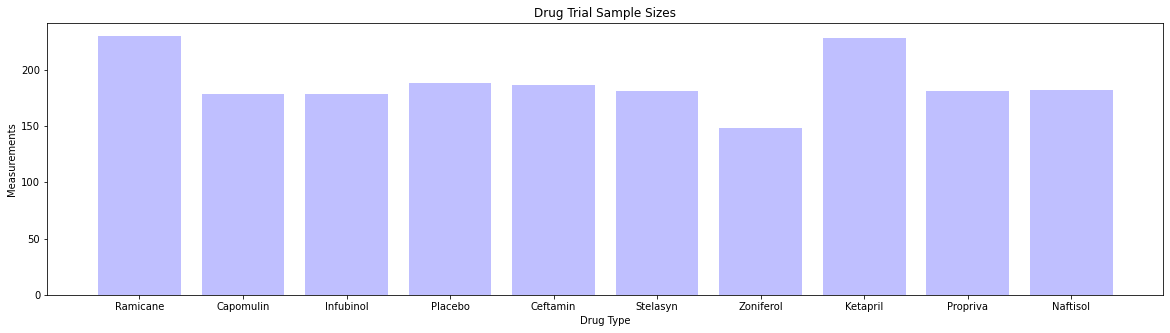

In [170]:
bar_cnt=clean_df.groupby('Drug Regimen').count()['Mouse ID']
bar_cnt
drug_list=clean_df['Drug Regimen'].unique()
plt.figure(figsize=(20,5))
plt.bar(drug_list, bar_df, color='b', alpha=0.25, align="center")
plt.title("Drug Trial Sample Sizes")
plt.xlabel("Drug Type")
plt.ylabel("Measurements")


In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [200]:
sex_df=df['Sex']
sex_cnt_df=sex_df.value_counts()
sex_cnt_df

Male      958
Female    935
Name: Sex, dtype: int64

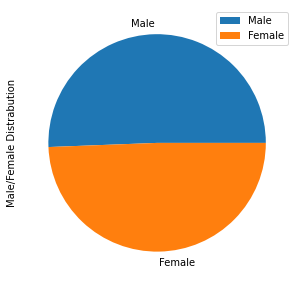

In [242]:
sex_df_unique=df['Sex'].unique().tolist()
sex_cnt=sex_df.value_counts(sort=True).tolist()

pie_df = pd.DataFrame({'Sex of Mice': sex_df_unique,'Male/Female Distrabution': sex_cnt},index=['Male','Female'])
pie_df.plot.pie(y='Male/Female Distrabution',figsize=(5,5))


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



Text(0.5, 1.0, 'Male/Female Distrabution')

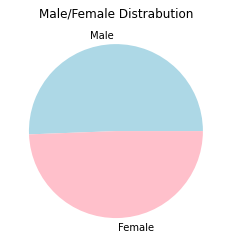

In [240]:
sex_df_unique=df['Sex'].unique().tolist()
sex_cnt=sex_df.value_counts(sort=True).tolist()
colors=["lightblue","pink"]
plt.pie(sex_cnt, labels=sex_df_unique, colors=colors)
plt.title('Male/Female Distrabution')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
